In [1]:
from spiketimes.plots import plot_waveform_peaks

In [22]:
from ephys_queries import select_waveforms, db_setup_core
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import dotenv
from pyarrow.feather import write_feather
from pathlib import Path

In [3]:
from spiketimes.df import waveform_peaks_by_neuron

In [4]:
dotenv.load_dotenv()
engine, metadata = db_setup_core()
exp_names = ["OPTO"]

In [5]:
df_waveforms = res = select_waveforms(engine, metadata, exp_names=exp_names)

In [8]:
neuron_ids = df_waveforms.neuron_id.unique()

In [6]:
df_peaks = waveform_peaks_by_neuron(df_waveforms)

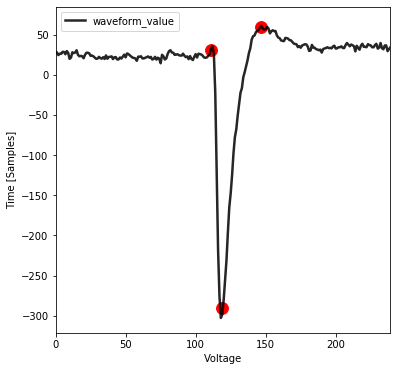

In [21]:
plot_waveform_peaks(df_waveforms, df_peaks, neuron_id=neuron_ids[51])

In [29]:
data_dir = Path(".").absolute().parent /"data"

write_feather(df_peaks, data_dir / "waveform_peaks.feather")
write_feather(df_waveforms, data_dir / "waveforms.feather")

PosixPath('/home/rory/repos/opto_analysis/data')